<a href="https://colab.research.google.com/github/KuanChihLee/Generative-Adversarial-Networks/blob/master/DCGAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Reference
Github Resource: 
1. https://github.com/eriklindernoren/Keras-GAN/tree/master/dcgan
2. https://github.com/daymos/simple_keras_GAN

#### This program is the first lesson for begineer's level workers to understand how to build a GAN model and how it works.

In [0]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

import os

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization
from keras.layers import Conv2D, UpSampling2D
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.models import Sequential
from keras.optimizers import Adam, SGD, RMSprop

In [0]:
def generator():
  model = Sequential()
  model.add(Dense(7*7*512, input_shape=(100,)))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Activation('relu'))
  model.add(Reshape((7,7,512)))
  model.add(Dropout(0.2))
  
  model.add(UpSampling2D())
  model.add(Conv2D(256, 5, padding='same'))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  
  model.add(Conv2D(64, 5, padding='same'))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  
  model.add(Conv2D(1, 5, padding='same'))
  model.add(Activation('tanh'))
  
  return model

def discriminator():
  model = Sequential()
  model.add(Conv2D(64, 5, strides=2, input_shape=(28,28,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.2))
    
  model.add(Conv2D(128, 5, strides=2, padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.2))

  model.add(Conv2D(256, 5, strides=2, padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.2))

  model.add(Conv2D(512, 5, strides=1, padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  
  return model

In [0]:
model_G = generator()
model_G.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25088)             2533888   
_________________________________________________________________
batch_normalization_1 (Batch (None, 25088)             100352    
_________________________________________________________________
activation_1 (Activation)    (None, 25088)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 512)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 512)         0         
_________________________________________________________________
up_sampling2d_1 (UpSa

In [0]:
model_D = discriminator()
model_D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 256)         819456    
__________

In [0]:
optimizer = Adam(lr=0.0002, beta_1=0.5, decay=8e-8)
model_discriminator = Sequential()
model_discriminator.add(model_D)
model_discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model_discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 1)                 4311553   
Total params: 4,311,553
Trainable params: 4,311,553
Non-trainable params: 0
_________________________________________________________________


In [0]:
optimizer = Adam(lr=0.0002, beta_1=0.5, decay=8e-8)
model_adversarial = Sequential()
model_adversarial.add(model_G)

model_D.trainable = False

model_adversarial.add(model_D)
model_adversarial.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model_adversarial.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 28, 28, 1)         6938881   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 4311553   
Total params: 11,250,434
Trainable params: 6,887,809
Non-trainable params: 4,362,625
_________________________________________________________________


In [0]:
## Read data
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
print(X_train.shape)
X_train = np.expand_dims(X_train, axis=3)
print(X_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [0]:
len(X_train)

60000

In [0]:
a = np.ones((16, 1))
b = np.zeros((16, 1))
np.concatenate((a,b))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [0]:
def train(X_train, epochs=3000, batch=128, save_interval=500):
  
  for cnt in range(epochs+1):
    
    ## train discriminator
    ground_image = X_train[np.random.randint(0, X_train.shape[0], size=batch),:,:,:]
    
    gen_noise = np.random.normal(0, 1, size=[batch, 100])
    gen_image = model_G.predict(gen_noise)
    
    x_combined_batch = np.concatenate((ground_image, gen_image))
    y_combined_batch = np.concatenate((np.ones((batch, 1)), np.zeros((batch, 1))))
    
    d_loss = model_discriminator.train_on_batch(x_combined_batch, y_combined_batch)
    
    ## train generator
    input_noise = np.random.normal(0, 1, size=[batch, 100])  
    y_mislabled = np.ones((batch, 1))

    g_loss = model_adversarial.train_on_batch(input_noise, y_mislabled)
    
    if cnt % 100 == 0:
      print ('epoch: %d, [Discriminator :: d_loss: %f], [ Generator :: loss: %f]' % (cnt, d_loss[0], g_loss[0])) 
      
    if cnt % save_interval == 0:
      plot_images(save2file=True, step=cnt)
      
def plot_images(save2file=False, samples=16, step=0):
  ''' Plot and generated images '''
  if not os.path.exists("./images"):
    os.makedirs("./images")
  filename = "./images/mnist_%d.png" % step
  
  gen_noise = np.random.normal(0, 1, (16, 100))
  gen_image = model_G.predict(gen_noise)
  
  plt.figure(figsize=(10, 10))
  for i in range(gen_image.shape[0]):
    plt.subplot(4, 4, i+1)
    image = gen_image[i, :, :, :]
    image = np.reshape(image, [28, 28])
    plt.imshow(image, cmap='gray')
    plt.axis('off')
  plt.tight_layout()
  
  if save2file:
    plt.savefig(filename)
    plt.close('all')
  else:
    plt.show()

In [0]:
_ = train(X_train)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch: 0, [Discriminator :: d_loss: 0.686575], [ Generator :: loss: 0.623218]
epoch: 100, [Discriminator :: d_loss: 0.690966], [ Generator :: loss: 0.673997]
epoch: 200, [Discriminator :: d_loss: 0.734142], [ Generator :: loss: 0.750633]
epoch: 300, [Discriminator :: d_loss: 0.677589], [ Generator :: loss: 0.733875]
epoch: 400, [Discriminator :: d_loss: 0.686678], [ Generator :: loss: 0.680625]
epoch: 500, [Discriminator :: d_loss: 0.703070], [ Generator :: loss: 0.710214]
epoch: 600, [Discriminator :: d_loss: 0.682420], [ Generator :: loss: 0.729375]
epoch: 700, [Discriminator :: d_loss: 0.668888], [ Generator :: loss: 0.761522]
epoch: 800, [Discriminator :: d_loss: 0.680162], [ Generator :: loss: 0.703388]
epoch: 900, [Discriminator :: d_loss: 0.664166], [ Generator :: loss: 0.726140]
epoch: 1000, [Discriminator :: d_loss: 0.706095], [ Generator :: loss: 0.810018]
epoch: 1100, [Discriminator :: d_loss: 0.648648], [ Generator :: loss: 0.782713]
epoch: 1200, [Discriminator :: d_loss: 0

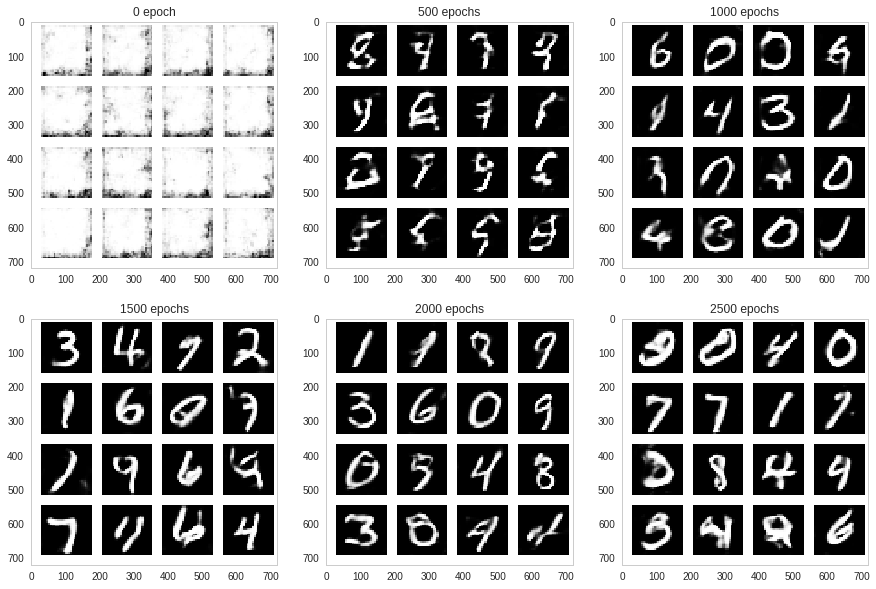

In [0]:
import matplotlib.image as mpimg
fig = plt.figure(figsize=(15,10))
img=mpimg.imread('./images/mnist_0.png')
ax1 = fig.add_subplot(231)
ax1.imshow(img)
ax1.grid(False)
img=mpimg.imread('./images/mnist_500.png')
ax2 = fig.add_subplot(232)
ax2.imshow(img)
ax2.grid(False)
img=mpimg.imread('./images/mnist_1000.png')
ax3 = fig.add_subplot(233)
ax3.imshow(img)
ax3.grid(False)
img=mpimg.imread('./images/mnist_1500.png')
ax4 = fig.add_subplot(234)
ax4.imshow(img)
ax4.grid(False)
img=mpimg.imread('./images/mnist_2000.png')
ax5 = fig.add_subplot(235)
ax5.imshow(img)
ax5.grid(False)
img=mpimg.imread('./images/mnist_2500.png')
ax6 = fig.add_subplot(236)
ax6.imshow(img)
ax6.grid(False)
ax1.title.set_text('0 epoch')
ax2.title.set_text('500 epochs')
ax3.title.set_text('1000 epochs')
ax4.title.set_text('1500 epochs')
ax5.title.set_text('2000 epochs')
ax6.title.set_text('2500 epochs')